# Universal Functions: Fast Element-Wise Array Functions

Universial functions, or ufunc, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functinos that take one or more scalar values and produce one or more scalar results.

Many ufuncs are simple element-wise transformations, like ```sqrt``` or ```exp```
These are refferd to as unary ufuncs

In [1]:
import numpy as np

In [3]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [5]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

Others, such as ```add``` or ```maximum```, take two arrays (thus, binary ufuncs) and return a single arrat as the result. 

In [6]:
x = np.random.randn(8)
y = np.random.randn(8)

In [7]:
x

array([-0.89502511, -1.91072519,  0.42268889,  1.25010587,  0.06359037,
        2.16030833, -0.38017897,  0.0577955 ])

In [8]:
y

array([-0.33060687, -1.12037992, -0.16446427, -1.49567682,  0.57101804,
        0.65391363,  0.34516472,  1.19326758])

In [11]:
# here np.maximum computed the element-wise maximum of the elements in x and y
np.maximum(x,y)

array([-0.33060687, -1.12037992,  0.42268889,  1.25010587,  0.57101804,
        2.16030833,  0.34516472,  1.19326758])

> See page 109 for more (Python for data analysis)

# Array oriented programming with arrays

> - The practice of replacing explicit loops with array expressions is commonly refferd to as vectorization.
> - In general vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents. 

As an simple example, supposeo we wished to evaluate the function sqrt (x^2 + y^2) across a singular grid of values. The np.meshgrid function takes two 1D arrays and produces two 2D matrices cirresponding to all paris of (x, y) in the two arrays.  

In [12]:
points = np.arange(-5,5,0.01) # 1000 equally spaced points

In [13]:
xs, ys = np.meshgrid(points, points)

In [14]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would write with two points: 

In [16]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [22]:
import matplotlib.pyplot as plt

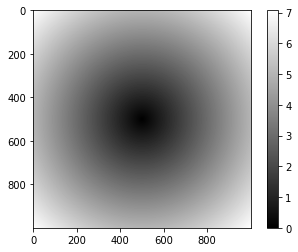

In [27]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

In [28]:
plt.title("Image plot of $\sqrt(x^2+y^2)$ for a grid of values")

Text(0.5, 1.0, 'Image plot of $\\sqrt(x^2+y^2)$ for a grid of values')

ValueError: 
\sqrt(x^2+y^2)
     ^
Expected \sqrt{value}, found '('  (at char 5), (line:1, col:6)

<Figure size 432x288 with 1 Axes>

### Expressing conditional Logic as array operations

The numpy.where funciton is a vectorized version of the ternary expression ```x if condition else y```. Suppose we had a boolean array and two arrays if values

In [30]:
xarr = np.array([1.2,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True, False, True, True, False])

Suppose we want to take a value from xarr whenever the corresponding value in cond is True and otherwise take the value from yarr, A list comprehension doing this might look like:

In [36]:
result = [(x if c else y)
    for x,y,c in zip(xarr, yarr, cond)]

In [37]:
%%time
result

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


[1.2, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. 
- First it is slow for large arrays because the work is being done in interpreted python code. 
- Second, it will not work with multidimentional arrays. With np.where you can write this very consisely.

In [38]:
result = np.where(cond, xarr,yarr)

In [39]:
%%time
result

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.77 µs


array([1.2, 2.2, 1.3, 1.4, 2.5])

The second and third argument to np.where does not need to be arrays. One or both can be scalars. A typical use of np.where in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 an all negative values with -2. This is very easy to do with np.where. 

In [40]:
arr = np.random.randn(4,4)
arr

array([[-1.17393437, -0.35051737,  0.27576564,  0.67412223],
       [-1.90702621, -1.05034914,  1.60417212,  2.14948081],
       [-0.36989015, -0.47221538,  0.75242493, -1.02797853],
       [ 2.27022085, -0.01070927,  1.04265093, -0.08574634]])

In [41]:
arr > 0

array([[False, False,  True,  True],
       [False, False,  True,  True],
       [False, False,  True, False],
       [ True, False,  True, False]])

In [42]:
np.where(arr>0,2,-2)

array([[-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2, -2,  2, -2],
       [ 2, -2,  2, -2]])

In [43]:
# you can combine scalars and arrays

np.where(arr>0,2,arr) # set only positive values to 2

array([[-1.17393437, -0.35051737,  2.        ,  2.        ],
       [-1.90702621, -1.05034914,  2.        ,  2.        ],
       [-0.36989015, -0.47221538,  2.        , -1.02797853],
       [ 2.        , -0.01070927,  2.        , -0.08574634]])

### Mathematical and Statistical methods

You can use aggregations (often calledreductions) slike ```sum```, ```mean``` and ```std``` (standard deviation) either by calling the array instance method or using the top-level Numpy function. 

In [55]:
arr = np.random.randn(5,4)
arr

array([[ 0.48965915,  1.40103104, -0.20999493, -1.00790928],
       [-0.61559645,  0.71825407, -0.60828634, -0.82280534],
       [ 0.84430031, -0.3774526 ,  0.0184073 ,  0.33928082],
       [ 1.29370943,  0.58848285, -1.15792773, -1.64433438],
       [-0.01833543,  0.11713645, -1.06277578,  0.24001484]])

In [56]:
arr.mean()

-0.07375710043370565

In [57]:
np.mean(arr)

-0.07375710043370565

In [59]:
arr.sum()

-1.475142008674113

functions like sum and mean take an optional axis argument that computes the statistic over the given axis, resulting in an array with one fewer dimention.

- ```arr.mean(1)``` = compute mean across colums (for each row)
- ```arr.sum(0)```= compute sum down the rows (for each column)

In [60]:

arr.mean(axis=1) # 5 results = 5 rows

array([ 0.1681965 , -0.33210852,  0.20613396, -0.23001746, -0.18098998])

In [61]:
arr.sum(axis=0) # 4 results = 4 columns

array([ 1.993737  ,  2.44745182, -3.02057749, -2.89575334])

```cumsum``` and ```cumprod``` does not aggrigate, but instaed produces an array of intermediate results



In [64]:
arr = np.arange(0,8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [65]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

- In multidimentional arrays, accumilation functions like ```cumsum``` return an array of the same size, but with different aggregate computed along the indicated axis according to each lower dimentional slice. 

In [68]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [69]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [70]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### Methods for boolean arrays

Boolean values are coerced to 1 (True) or 0 (False) ub tge orecedubg netgids, Thusum ```sum``` is often used as a means of counting True values in a boolean array.

In [71]:
arr = np.random.randn(100)

In [72]:
(arr > 0).sum() # number of positive values

47

There are two additional methods useful especially for boolean arrays. 
```any``` tests whether one or more values in an array is True, while ```all``` checks if every value is True

In [76]:
bools = np.array([False, False, True, False])

In [77]:
bools.any()

True

In [78]:
bools.all()

False

### Sorting

Like Pythons built-in list type, Numpy can be sorted in-place with the sort method.

In [79]:
arr = np.random.randn(6)
arr

array([ 0.21528934,  1.72291951, -0.26922952, -1.08119722,  0.43470189,
        0.44554708])

In [81]:
arr.sort()
arr

array([-1.08119722, -0.26922952,  0.21528934,  0.43470189,  0.44554708,
        1.72291951])

You can sort each one-dimentional section of values in a multidimentional array in-place along an axis by passing the axis number to sort.

In [82]:
arr = np.random.randn(5,3)
arr

array([[ 1.38462043, -0.67576458, -1.46838304],
       [-2.87815321, -0.15998858, -0.68613571],
       [ 0.26432071,  0.3772043 , -1.38989932],
       [-0.60420138,  0.8821115 ,  0.21173706],
       [-2.31777292,  0.09408783, -1.801408  ]])

In [84]:
arr.sort(1)
arr

array([[-1.46838304, -0.67576458,  1.38462043],
       [-2.87815321, -0.68613571, -0.15998858],
       [-1.38989932,  0.26432071,  0.3772043 ],
       [-0.60420138,  0.21173706,  0.8821115 ],
       [-2.31777292, -1.801408  ,  0.09408783]])

The top-level method np.sort returns a sorted copy of an array insted of modifying the array in-place. A quick and dirty way to compute the quantiles of an array is to sort and select the values at a particular rank

In [85]:
large_arr = np.random.randn(1000)

In [86]:
large_arr.sort()

In [87]:
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5966689290594274

### Unique and other set logic

```np.unique``` returns sorted unique values in an array

In [89]:
names = np.array(['Bob', 'Will', 'Pete', 'Joe', 'Bob'])

In [90]:
np.unique(names)

array(['Bob', 'Joe', 'Pete', 'Will'], dtype='<U4')

In [91]:
ints = np.array([3,3,3,2,2,1,1,4,4])

In [92]:
np.unique(ints)

array([1, 2, 3, 4])

|  Method | Description  |
|---|---|
| unique(x)  |  Compute the sorted , unique values in x |
| intersect1d(x,y)  | Compute the sorted, common elements in x and y  |
| union1d(x,y)  | Computethe sorted union of elements  |
| in1d(x,y)  | Compute a boolean array indicating whether each element of x is contained in y  |
| setdiff1d(x,y)  |  Set difference, elements in x that is not in y |
| setxor1d(x,y)>  |  Set symetric difference, elements that are in either of the arrays, bot not in both |

# File input and Output with arrays

The ```np.save``` and ```np.load``` are the two workhorse functions for efficiently saving and loading array data on disk. 

Arrays are saved by default in an uncompressed raw binary format with file extension .npy


In [93]:
arr = np.arange(10)


In [94]:
np.save('Some array', arr)

In [95]:
np.load('Some array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [97]:
# You save multiple arrays in an uncompressed archive using np.savez and passing the arrays as keyword argument
np.savez('array_archive.npz', a=arr, b=arr)

In [98]:
# When loading an .npz file, you get back a dict-like object that loads the individual arrays lazily
arch = np.load('array_archive.npz')

In [99]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Linear algebra

matrix multiplication, decompositions and determinants

In [104]:
x  = np.array([[1.,2.,3.],[4.,5.,6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [106]:
y  = np.array([[6.,23.],[-1,7],[8,9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [107]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [108]:
np.dot(x,y) # is equal 

array([[ 28.,  64.],
       [ 67., 181.]])

In [109]:
# a matrix product between a two-dimentional array and a suitably sized one-dim array, results in a one-dim array
np.dot(x, np.ones(3))

array([ 6., 15.])

```numpy.linalg``` has a standard set of matrix decompositions and things like inverse and determinant. These are implemented under the hood via the same industry standard linear algebra libraries used in languages like METLAB adn R.

In [110]:
from numpy.linalg import inv, qr

In [127]:
X = np.random.randn(5,5)

In [128]:
mat = X.T.dot(X)

In [129]:
inv(mat)

array([[ 0.16193954, -0.11901227,  0.13378118, -0.30821226,  0.08315112],
       [-0.11901227,  0.23475077, -0.10777655, -0.07455356,  0.4026465 ],
       [ 0.13378118, -0.10777655,  0.3774822 , -0.9114557 ,  0.40983901],
       [-0.30821226, -0.07455356, -0.9114557 ,  8.25185461, -7.2844462 ],
       [ 0.08315112,  0.4026465 ,  0.40983901, -7.2844462 ,  7.8458525 ]])

In [130]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  1.38253074e-16,  1.37957224e-16,
        -7.23248838e-16, -4.01183151e-17],
       [ 6.94153674e-17,  1.00000000e+00,  1.32978287e-19,
        -6.48926926e-16,  4.62411525e-16],
       [-3.89988895e-17, -3.36125060e-17,  1.00000000e+00,
         1.32874365e-15,  6.78469590e-16],
       [ 9.43997049e-18, -2.24431742e-17, -2.18870293e-17,
         1.00000000e+00, -4.65427767e-16],
       [-4.39307681e-17, -7.30603499e-18, -9.57872998e-17,
         3.65139484e-16,  1.00000000e+00]])

In [131]:
q, r = qr(mat)

In [132]:
r

array([[-14.27500927,  -9.31498224,   4.05982347,   1.13757725,
          1.47787795],
       [  0.        ,  -6.36162836,  -1.5005625 ,   0.96856565,
          1.32895596],
       [  0.        ,   0.        ,  -6.42858236,  -2.69541686,
         -2.20158227],
       [  0.        ,   0.        ,   0.        ,  -0.79157771,
         -0.8104071 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.09326769]])

##### Commonly used numpy.linalg functions

|  Function | Description  |
|---|---|
| diag  |  Retun the diagonal elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal |
| dot  | Matrix multiplication  |
| trace | Compute the sum of the diagonal elements |
| det  | Compute the matrix determinant |
| eig  |  Compute the eigenvalues and eigenvectors of a square matrix|
| inv  |  Compute the inverse of a square matrix |
| pinv |  Compute the Moore-Penrose pseudo-inverse of a matrix |
| qr |  Compute the QR decomposition |
| svd |  Compute the singular value decomposition |
| solve |  Solve the linar system Ax = b for x, where A is a square matrix |
| lstsq |  Compute the lest squares solution at Ax = b |

## Pseudirandom Number Generation

The numpy.random module

In [134]:
# you can get a 4x4 array of samples from the standard normal distribution using normal

samples = np.random.normal(size=(4,4))
samples

array([[-0.48679617, -1.7688991 , -0.24666197,  1.00444601],
       [ 1.8153468 , -1.92861876,  0.87303922,  0.78120736],
       [ 1.5705968 , -0.03324371,  0.64416446, -0.31202453],
       [-0.34903548, -0.84871126, -0.47595207,  1.27095415]])

In [135]:
# this is faster than using pythons built-in random module

from random import normalvariate

In [136]:
N = 1000000

In [142]:
%timeit samples = [normalvariate(0,1) for _ in range(N)]

351 ms ± 2.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [143]:
%timeit np.random.normal(size=N)

15.1 ms ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


We say that these are pseudorandom numbers because they are generated by an algorithm with deterministic behavior based on the ***seed*** of the random number generator. You can change the seed using np.random.seed

In [144]:
np.random.seed(1234)

In [145]:
# data generatoion functions in numpy.random use a global random seed. To avoid global state use:
rng = np.random.RandomState(1234)

In [146]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## Example: Random Walks

In [147]:
# here is the pure python way of implementation

import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

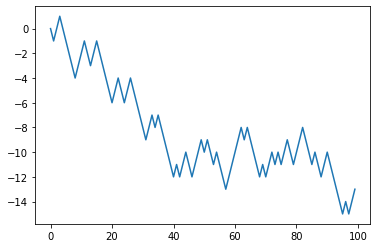

In [148]:
plt.plot(walk[:100])

You might make the observation that walk is simply the cumulative sum of the random steps and could be evaluated as en array expression. Thus, I use the np.random module to draw 1000 coin flips at once, set these to 1 and -1 and compute the cumulative sum

In [149]:
nsteps = 1000

In [150]:
draws = np.random.randint(0, 2, size=nsteps)

In [151]:
steps = np.where(draws > 0, 1, -1)

In [152]:
walk = steps.cumsum()

In [153]:
# from this we can start to extract statistics

In [154]:
walk.min()

-9

In [155]:
walk.max()

60

In [156]:
from numpy import argmax


(np.abs(walk) == 10).argmax()

297

#### Simulating many random walks at Once 

In [157]:
nwalks = 5000
nsteps = 1000

In [158]:
draws = np.random.randint(0,2,size=(nwalks,nsteps)) # 0 or 1

In [159]:
steps = np.where(draws > 0, 1, -1)

In [160]:
walks = steps.cumsum(1)

In [161]:
# we comute the max and min

walks.min()

-128

In [162]:
walks.max()

122

Out of these walks, lets compute the minimum crossing time to 30 or -30. This is slightly tricky because not all 5000 of them reach 30. We can check this using the ```any``` method.

In [163]:
hits30 = (np.abs(walks) >= 30).any(1)

In [164]:
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [165]:
hits30.sum() #number that hit 30 or -30

3368

we can use this boolean array to select outthe rows of walks that actually cross the absolute 30 level and call argmax agross axis 1 to get the crossing times

In [166]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [167]:
crossing_times

array([133, 395, 343, ..., 409, 297, 747])

In [168]:
# we compute the average minimum crossing time
crossing_times.mean()

509.99762470308787